## Implementing CNN Model 

## Import Libraries
<div id="0">
</div>

Before starting with the dataset, we require to import certain libraries to aid us in data preprocessing, visualisation and training. They are imported as shown below.

In [4]:
# To check if GPU is active
from tensorflow.python.client import device_lib

# Load Data
import os
import cv2
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt

# Model Training
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

## 1. Load Data
<div id="1">
</div>

In [5]:
train_dir = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
test_dir = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'

In [6]:
def get_data(data_dir) :
    images = []
    labels = []
    
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Obtaining images of", dir_list[i], "...")
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (32, 32))
            images.append(img)
            labels.append(i)
    
    return images, labels
        
X, y = get_data(train_dir)

Obtaining images of N ...
Obtaining images of R ...
Obtaining images of space ...
Obtaining images of B ...
Obtaining images of I ...
Obtaining images of del ...
Obtaining images of F ...
Obtaining images of H ...
Obtaining images of E ...
Obtaining images of U ...
Obtaining images of M ...
Obtaining images of X ...
Obtaining images of K ...
Obtaining images of Q ...
Obtaining images of Y ...
Obtaining images of S ...
Obtaining images of G ...
Obtaining images of A ...
Obtaining images of O ...
Obtaining images of T ...
Obtaining images of V ...
Obtaining images of Z ...
Obtaining images of C ...
Obtaining images of P ...
Obtaining images of L ...
Obtaining images of W ...
Obtaining images of D ...
Obtaining images of nothing ...
Obtaining images of J ...


Checking size of the data

In [7]:
print(len(X), len(y))

87000 87000


## 2. Data Visualisation
<div id="2">
</div>

Before preprocessing our data, we decided to explore and gain insight into the images we are dealing with. For simplicity, let us load one sample image from each class.

In [8]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

<Figure size 432x288 with 0 Axes>

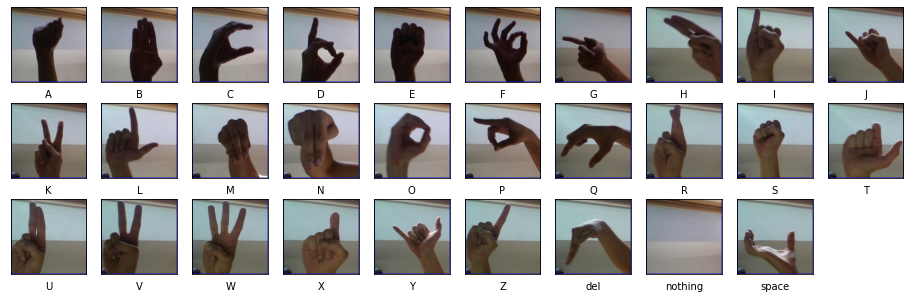

In [9]:
def plot_sample_images():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range (0,29):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes[i])
        
plot_sample_images()

We can observe various sign language images as seen above. These denote different alphabets and symbols that our model would be trained to recognize. 

## 3. Data Preprocessing
<div id="3">
</div>

Here we transformed the data into numpy arrays and normalize the values by dividing the picture pixel values by 255 before feeding it to our model. 

Then, we separate our training data into training and testing sets for the model to use. 

In [10]:
def preprocess_data(X, y):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32')/255.0
    
    label_encoded_y = utils.to_categorical(y)
    
    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.1)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)

Let us confirm the size of training and testing data.

In [11]:
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)

Training data: (78300, 32, 32, 3)
Test data: (8700, 32, 32, 3)


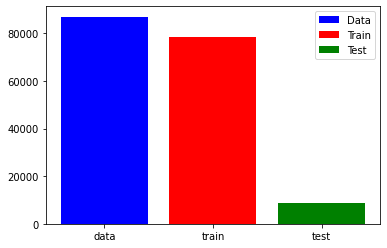

In [12]:
#visulaize data
fig, ax = plt.subplots()
ax.bar("data",87000 ,color= 'b', label='Data')
ax.bar("train",78300 ,color= 'r', label='Train')
ax.bar("test",8700 ,color='g', label='Test')
leg = ax.legend();

## 4. Define CNN Model
<div id="4">
</div>

Next, we define the architecture of our custom CNN Model. 

I have trained the model for 15 epochs, with the standard batch size of 32. Feel free to experiment with them for your use cases.

In [13]:
classes = 29
batch = 32
epochs = 15
learning_rate = 0.001

For our model, let us initialize a Keras Sequential model. 

The defined model is a 4 layer deep CNN model. Batch normalisation and dropout layers have been added to avoid overfitting on the training set and perform regularization. Max pooling is also applied.

The three CNN layers have been flattened out and connected to a dense layer before performing classification using the softmax activation function.

This model is created by experimenting with various layers to achieve the maximum validation accuracy.

In [14]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(classes, activation='softmax'))

Adam is used as the optimizer here with 0.001 as its learning rate.

Since this is a multiclass classification, categorical crossentropy is chosen as the loss function. The model is trained on the metric of accuracy.

In [15]:
adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


The summary of our CNN architecture can be seen below. 
Overall it contains 4,596,765 trainable parameters.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 128)         0

## 5. Train Model
<div id="5">
</div>

Now, let us train the model on our training data. 
I have used the standard validation split of 80:20 for training here.

This step can take several minutes to train the model.

In [17]:
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.2, shuffle = True, verbose=1)

Epoch 1/15
1958/1958 [==============================] - 23s 7ms/step - loss: 0.6092 - accuracy: 0.8203 - val_loss: 0.2038 - val_accuracy: 0.9275
Epoch 2/15
1958/1958 [==============================] - 12s 6ms/step - loss: 0.1305 - accuracy: 0.9602 - val_loss: 0.3112 - val_accuracy: 0.9067
Epoch 3/15
1958/1958 [==============================] - 12s 6ms/step - loss: 0.0917 - accuracy: 0.9745 - val_loss: 1.3044 - val_accuracy: 0.7939
Epoch 4/15
1958/1958 [==============================] - 12s 6ms/step - loss: 0.0708 - accuracy: 0.9811 - val_loss: 1.0816 - val_accuracy: 0.8235
Epoch 5/15
1958/1958 [==============================] - 11s 6ms/step - loss: 0.0581 - accuracy: 0.9852 - val_loss: 0.2183 - val_accuracy: 0.9540
Epoch 6/15
1958/1958 [==============================] - 12s 6ms/step - loss: 0.0532 - accuracy: 0.9870 - val_loss: 0.2868 - val_accuracy: 0.9472
Epoch 7/15
1958/1958 [==============================] - 12s 6ms/step - loss: 0.0444 - accuracy: 0.9892 - val_loss: 0.0632 - val_ac

## 6. Evaluate Model
<div id="6">
</div>

After completing the training of the model, let us evaluate its efficiency on the test data.

In [18]:
  test_loss, test_acc = model.evaluate(x_test, y_test)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)

272/272 [==============================] - 1s 3ms/step - loss: 0.0912 - accuracy: 0.9797
Test accuracy: 0.9796551465988159
Test loss: 0.09120027720928192


It reports **0.99885** Test accuracy which is very commendable. 

Now let us plot accuracy and loss over the training epochs to better understand the training of our model.

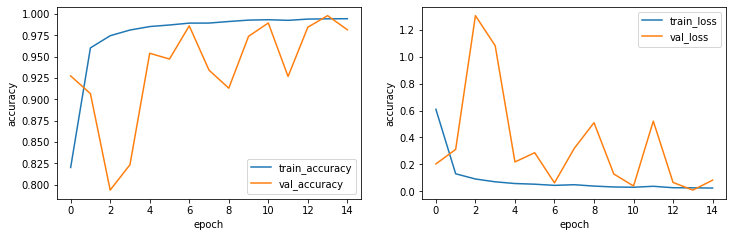

In [19]:
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()


    
plot_results(model)

As you can observe, the training and validation loss decreases with epochs while the training and validation accuracy increases. Our training and validation metrics continue to be relative, indicating that the model is generalised and not overfitting. 